In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from datetime import date, datetime
from itertools import cycle, islice
from IPython.core.interactiveshell import InteractiveShell

In [2]:
InteractiveShell.ast_node_interactivity = "all"
timestr = time.strftime("%Y%m%d-%H%M")
pd.options.display.max_rows = 1000

In [3]:
registration = pd.read_excel('./data/DATA_CLEANING-35990002.xlsx', skiprows=[0])
participation = pd.read_excel('./data/DATA_CLEANING-44030001.xlsx', skiprows=[0])

In [4]:
regs = registration[[
    'Identifier',
    '41480001|Nama Lengkap (Sesuai KTP/Kartu Pelajar)',
    '44020003|Tanggal Lahir',
    '47000004|Jenis Kelamin',
    '43440001|Alamat'
]]
pcs = participation[[
    'Identifier',
    '41480002|Daftar Kode Output-Aktifitas (Pastikan ke penyelenggara)',
    '36970009|Nama Aktifitas (lihat absensi kertas/backdrop kegiatan)',
    '40580002|Organisasi penyelenggara',
    '40550002|Tanggal Aktifitas (tanggal mulai)',
]]
youth_participation = pd.merge(pcs, regs, on='Identifier')
youth_participation = youth_participation.rename(columns = {
    '41480002|Daftar Kode Output-Aktifitas (Pastikan ke penyelenggara)':'Kode Output',
    '36970009|Nama Aktifitas (lihat absensi kertas/backdrop kegiatan)':'Nama Aktivitas',
    '40580002|Organisasi penyelenggara':'Organisasi Penyelenggara',
    '40550002|Tanggal Aktifitas (tanggal mulai)':'Tanggal Aktivitas',
    '41480001|Nama Lengkap (Sesuai KTP/Kartu Pelajar)':'Nama Lengkap',
    '44020003|Tanggal Lahir':'DOB',
    '47000004|Jenis Kelamin':'Jenis Kelamin',
    '43440001|Alamat':'Alamat',
})
youth_participation['Goal Code'] = youth_participation['Kode Output'].apply(lambda x: x.split('|')[3][:7])
youth_participation['Nama Aktivitas'] = youth_participation['Nama Aktivitas'].apply(lambda x: x.title())
youth_participation['Jenis Kelamin'] = youth_participation['Jenis Kelamin'].apply(lambda x:x.upper())
youth_participation['Provinsi'] = youth_participation['Alamat'].apply(lambda x:x.split('|')[0].replace('Prov. ',''))
youth_participation['Kota / Kab'] = youth_participation['Alamat'].apply(lambda x:x.split('|')[1])
youth_participation['Nama Lengkap'] = youth_participation['Nama Lengkap'].apply(lambda x:x.title())
youth_participation['DOB'] = youth_participation['DOB'].fillna(0)

In [5]:
def calculateAge(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    if age < 15:
        return '< 15'
    elif 15 <= age <=29:
        return '15 - 29'
    else:
        return '29 >'

In [6]:
youth_participation['Umur'] = youth_participation['DOB'].apply(lambda x: None if x == 0 else calculateAge(x))

Text(0.5,1,'Partisipan disetiap kota berdasarkan Organisasi Penyelenggara dan Goal Code')

Text(0,0.5,'Goal Code')

Text(0.5,0,'Total Peserta')

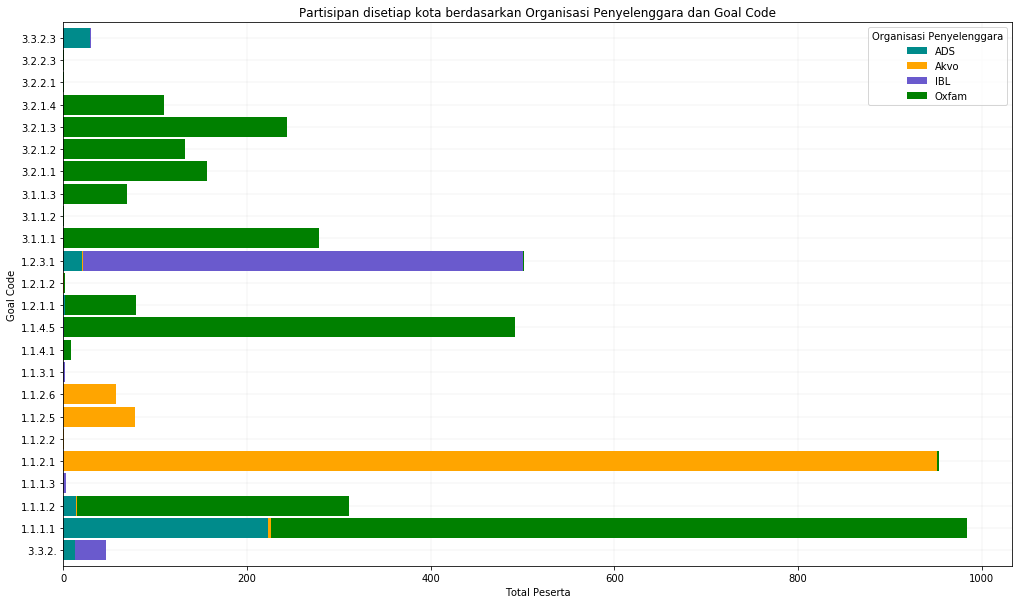

In [7]:
graph = youth_participation.groupby(['Goal Code','Organisasi Penyelenggara']).size().unstack()
colors = list(islice(cycle(['darkcyan', 'orange', 'slateblue', 'green']), None, len(graph)))
graph = graph.plot(kind='barh', stacked=True, figsize=(17, 10), zorder=2, width=.9, color=colors)
graph.grid(zorder=1, linestyle='-', linewidth=.3, alpha=.5)
graph.set_title('Partisipan disetiap kota berdasarkan Organisasi Penyelenggara dan Goal Code')
graph.set_ylabel('Goal Code')
graph.set_xlabel('Total Peserta')

Text(0.5,1,'Partisipan disetiap kota berdasarkan Jenis Kelamin dan Goal Code')

Text(0,0.5,'Goal Code')

Text(0.5,0,'Total Peserta')

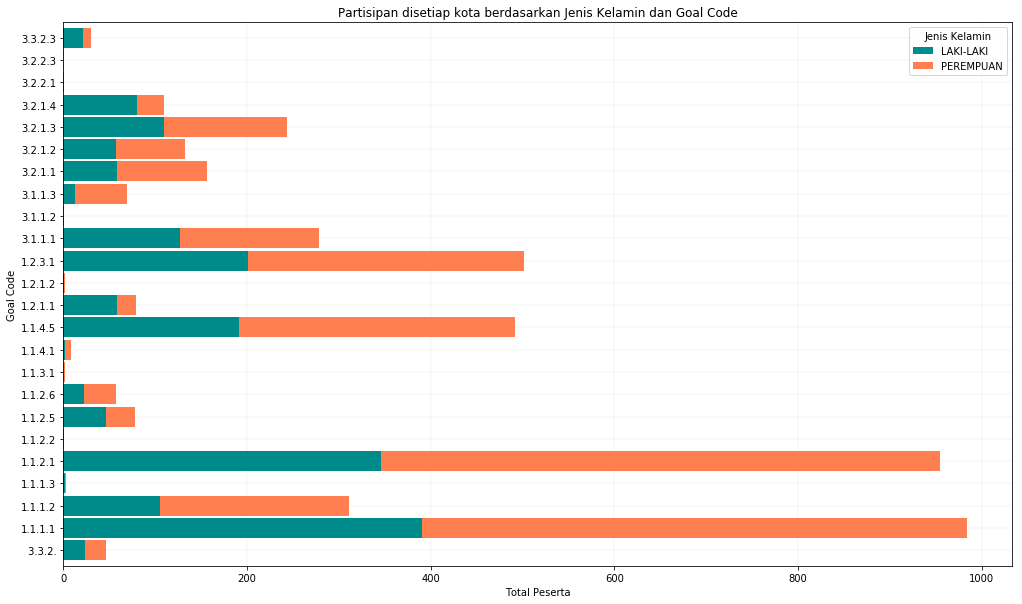

In [8]:
graph = youth_participation.groupby(['Goal Code','Jenis Kelamin']).size().unstack()
colors = list(islice(cycle(['darkcyan', 'coral']), None, len(graph)))
graph = graph.plot(kind='barh', stacked=True, figsize=(17, 10), zorder=2, width=.9, color=colors)
graph.grid(zorder=1, linestyle='-', linewidth=.3, alpha=.5)
graph.set_title('Partisipan disetiap kota berdasarkan Jenis Kelamin dan Goal Code')
graph.set_ylabel('Goal Code')
graph.set_xlabel('Total Peserta')

Text(0.5,1,'Partisipan disetiap kota berdasarkan Jenis Kelamin')

Text(0,0.5,'Propinsi')

Text(0,0.5,'Total Peserta')

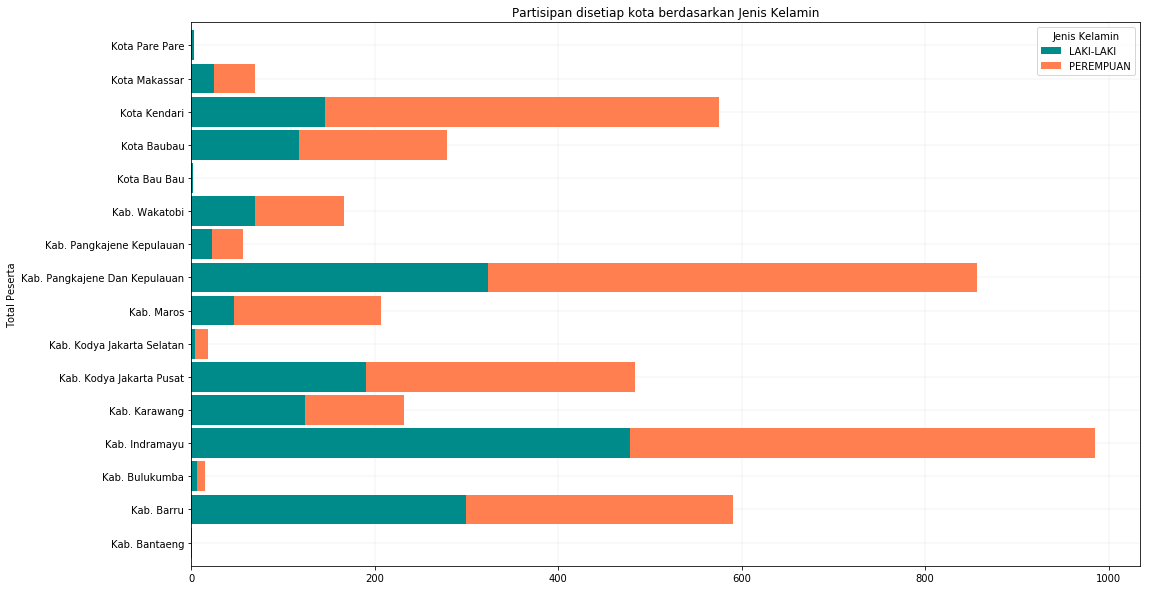

In [9]:
graph = youth_participation.groupby(['Kota / Kab','Jenis Kelamin']).size().unstack()
colors = list(islice(cycle(['darkcyan', 'coral']), None, len(graph)))
graph = graph.plot(kind='barh', stacked=True, figsize=(17, 10), zorder=2, width=.9, color=colors)
graph.grid(zorder=1, linestyle='-', linewidth=.3, alpha=.5)
graph.set_title('Partisipan disetiap kota berdasarkan Jenis Kelamin')
graph.set_ylabel('Propinsi')
graph.set_ylabel('Total Peserta')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

[None, None, None, None, None, None, None, None]

[None, None, None, None]

Text(0.5,1,'Seluruh Aktivitas berdasarkan Jenis Kelamin')

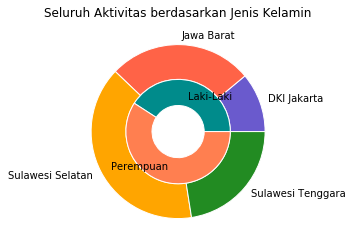

In [10]:
group_names=['DKI Jakarta','Jawa Barat','Sulawesi Selatan','Sulawesi Tenggara']
group_size=youth_participation.groupby(['Provinsi']).size()
subgroup_names=['Laki-Laki','Perempuan']
subgroup_size=youth_participation.groupby(['Jenis Kelamin']).size()
 
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1, labels=group_names, colors=['slateblue', 'tomato', 'orange', 'forestgreen'])
plt.setp( mypie, width=0.4, edgecolor='white')
 
mypie2, _ = ax.pie(subgroup_size, radius=0.6, labels=subgroup_names, labeldistance=0.7, colors=['darkcyan', 'coral'])
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.title('Seluruh Aktivitas berdasarkan Jenis Kelamin')
plt.show()

In [11]:
print('\nSeluruh Partisipan Aktivitas dengan Goal Code 1.1.1.1 berdasarkan Jenis Kelamin')
youth_participation.loc[youth_participation['Goal Code'] == '1.1.1.1'].groupby(['Jenis Kelamin']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Partisipan Aktivitas dengan Goal Code 1.1.1.1 berdasarkan Usia')
youth_participation.loc[youth_participation['Goal Code'] == '1.1.1.1'].groupby(['Umur']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Peserta yang Hadir di Workshop Video Berdasarkan Umur')
youth_participation.loc[youth_participation['Nama Aktivitas'].str.contains('Video')].groupby(['Umur']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Peserta yang Hadir di Workshop Video')
youth_participation.loc[youth_participation['Nama Aktivitas'].str.contains('Video')].groupby(['Kota / Kab']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Partisipan Aktivitas dengan Goal Code 1.1.1.1 berdasarkan Nama Aktivitas')
youth_participation.loc[youth_participation['Goal Code'] == '1.1.1.1'].groupby(['Nama Aktivitas']).size().to_frame('Peserta').reset_index()


Seluruh Partisipan Aktivitas dengan Goal Code 1.1.1.1 berdasarkan Jenis Kelamin


,Jenis Kelamin,Peserta
0,LAKI-LAKI,391
1,PEREMPUAN,593



Seluruh Partisipan Aktivitas dengan Goal Code 1.1.1.1 berdasarkan Usia


,Umur,Peserta
0,15 - 29,855
1,29 >,39
2,< 15,43



Seluruh Peserta yang Hadir di Workshop Video Berdasarkan Umur


,Umur,Peserta
0,15 - 29,126
1,29 >,1
2,< 15,8



Seluruh Peserta yang Hadir di Workshop Video


,Kota / Kab,Peserta
0,Kab. Indramayu,78
1,Kota Kendari,57



Seluruh Partisipan Aktivitas dengan Goal Code 1.1.1.1 berdasarkan Nama Aktivitas


,Nama Aktivitas,Peserta
0,Assesment,27
1,Assesment Di Baubau,2
2,Assesment Struktur Youth Hub,2
3,Assessment,20
4,Assessment 2 Lowu-Lowu,8
5,Diskusi Youth Hub (Core Team),12
6,Fgd,109
7,Fgd Dan Tes Akvo Flow,2
8,Fgd Dan Test Akvo Flow,2
9,Fgd Dengan Anak-Anak Sma/Smk Baubau,1


In [12]:
print('\nSeluruh Partisipan Aktivitas dengan Goal Code 1.1.2 berdasarkan Jenis Kelamin')
youth_participation.loc[youth_participation['Goal Code'].str.contains('1.1.2')].groupby(['Jenis Kelamin']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Partisipan Aktivitas dengan Goal Code 1.1.2 berdasarkan Usia')
youth_participation.loc[youth_participation['Goal Code'].str.contains('1.1.2')].groupby(['Umur']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Peserta yang Hadir di Workshop Video Berdasarkan Umur')
youth_participation.loc[youth_participation['Nama Aktivitas'].str.contains('Video')].groupby(['Umur']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Peserta yang Hadir di Workshop Video')
youth_participation.loc[youth_participation['Nama Aktivitas'].str.contains('Video')].groupby(['Kota / Kab']).size().to_frame('Peserta').reset_index()

print('\nSeluruh Partisipan Aktivitas dengan Goal Code 1.1.2 berdasarkan Nama Aktivitas')
youth_participation.loc[youth_participation['Goal Code'].str.contains('1.1.2')].groupby(['Nama Aktivitas']).size().to_frame('Peserta').reset_index()


Seluruh Partisipan Aktivitas dengan Goal Code 1.1.2 berdasarkan Jenis Kelamin


,Jenis Kelamin,Peserta
0,LAKI-LAKI,521
1,PEREMPUAN,882



Seluruh Partisipan Aktivitas dengan Goal Code 1.1.2 berdasarkan Usia


,Umur,Peserta
0,15 - 29,1160
1,29 >,119
2,< 15,117



Seluruh Peserta yang Hadir di Workshop Video Berdasarkan Umur


,Umur,Peserta
0,15 - 29,126
1,29 >,1
2,< 15,8



Seluruh Peserta yang Hadir di Workshop Video


,Kota / Kab,Peserta
0,Kab. Indramayu,78
1,Kota Kendari,57



Seluruh Partisipan Aktivitas dengan Goal Code 1.1.2 berdasarkan Nama Aktivitas


,Nama Aktivitas,Peserta
0,Community Action Learning,2
1,Diskusi Hcd,14
2,Field Visit Mith Richard And Eyw Team,1
3,Field Visit With Richard And Eyw Team,1
4,Field Visit With Ridchard And Eyw Team,5
5,Field Visit With Rideard And Eyw Team,1
6,Gals Adaptation And Tot Workshop,1
7,Hcd,1
8,Hcd Training,8
9,Hcd Training & Gals,1
